In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
L = 10
grid_sizes = [11,21,41,81]
sigmas = [0.1,0.25,0.75,1]

In [3]:
grids = [np.zeros((n,n)) for n in grid_sizes]
centre_coords = [int(np.ceil(i/2)-1) for i in grid_sizes]
for grid,pos in zip(grids,centre_coords):
    grid[pos,pos] = 1

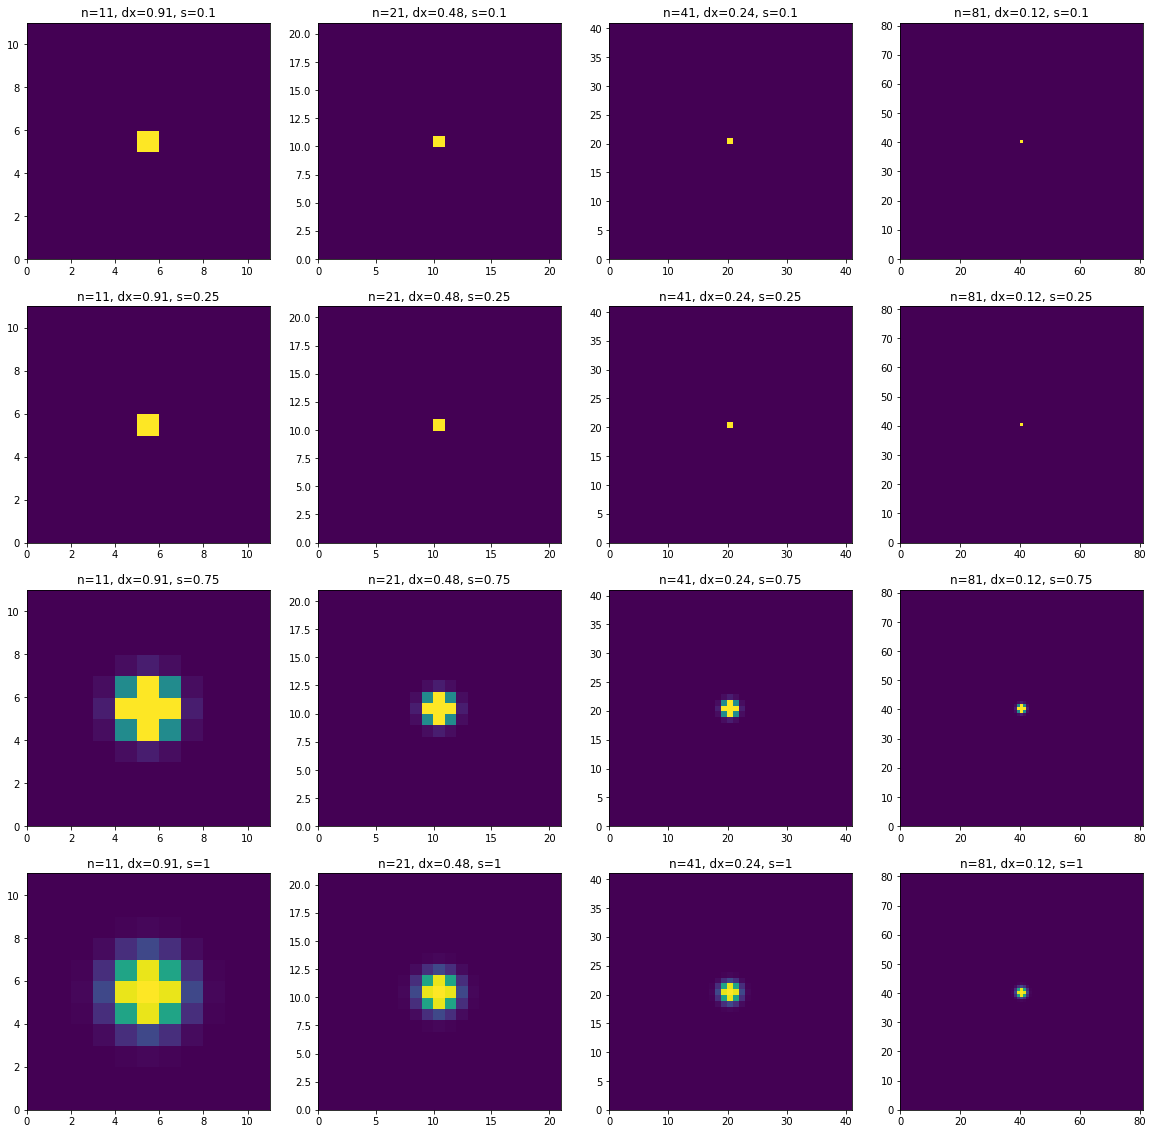

In [4]:
fig,ax = plt.subplots(len(grid_sizes),len(sigmas),figsize =(20,20))

for sigma, row in zip(sigmas,ax):
    i=0
    for col,grid_size in zip(row,grid_sizes):
        col.set_title(f'n={grid_size}, dx={np.round(L/grid_size,2)}, s={sigma}')
        col.pcolormesh(gaussian_filter(grids[i],sigma=sigma),vmin=0, vmax= 0.1)
        i+=1

The "bleed area"/number of changed pixels from the centre is independent of voxel size .. we want it to scale w/voxel size

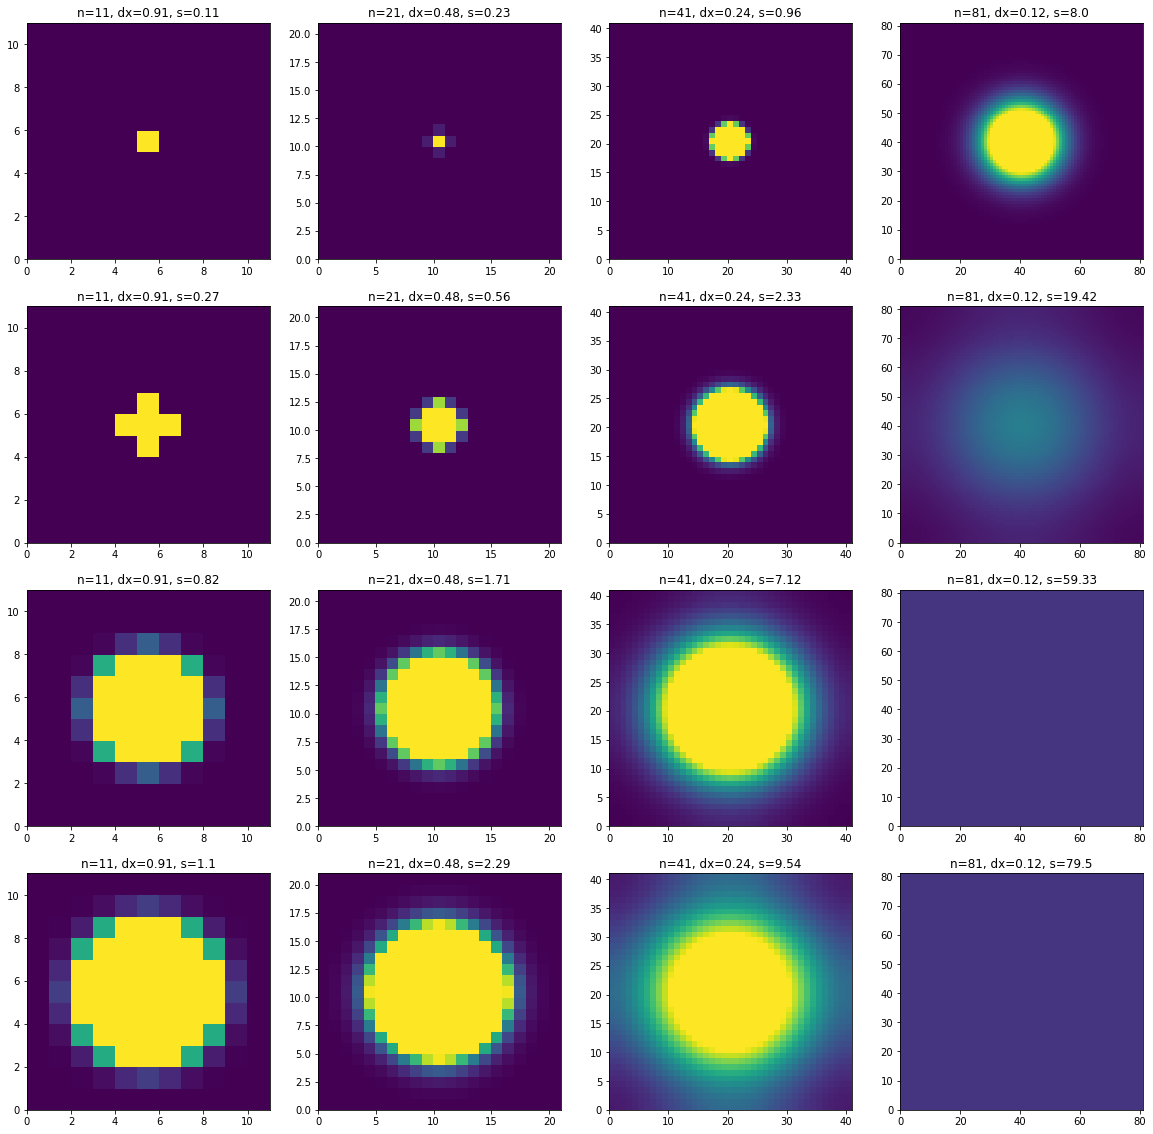

In [5]:
fig,ax = plt.subplots(len(grid_sizes),len(sigmas),figsize =(20,20))

for sigma, row in zip(sigmas,ax):
    i=0
    for col,grid_size in zip(row,grid_sizes):
        dx = np.round(L/grid_size,2)
        sigma = np.round(sigma/dx,2)
        col.set_title(f'n={grid_size}, dx={dx}, s={sigma}')
        col.pcolormesh(gaussian_filter(grids[i],sigma=sigma) ,vmin=0, vmax= 0.001)
        i+=1

Better because each dot occupies roughly the same space on the grid, but clearly we need some magnitude scaling

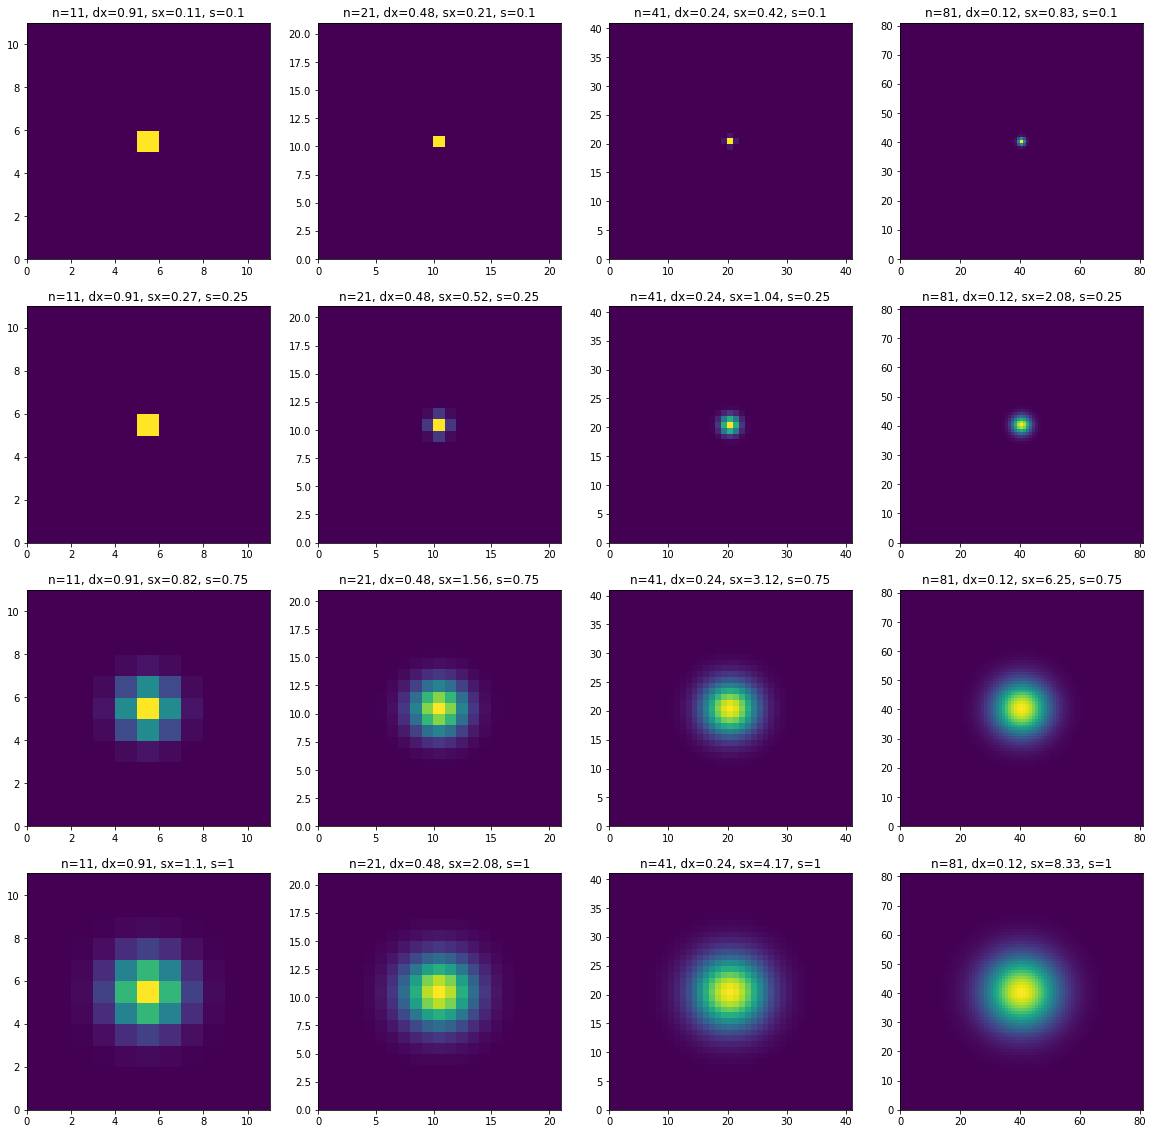

In [6]:
fig,ax = plt.subplots(len(grid_sizes),len(sigmas),figsize =(20,20))

for sigma, row in zip(sigmas,ax):
    i=0
    for col,grid_size in zip(row,grid_sizes):
        dx = np.round(L/grid_size,2)
        sigma_scaled = np.round(sigma/dx,2)
        blurred = gaussian_filter(grids[i],sigma=sigma_scaled)
        scaled = blurred/blurred.max()
        col.set_title(f'n={grid_size}, dx={dx}, sx={sigma_scaled}, s={sigma}')
        col.pcolormesh(scaled,vmin=0, vmax= 1)
        i+=1